# Cytometry Modeling and Analysis
### Assignment 1

## 1. Cell Surface Composition
### 1.1 Representing a random event 

First generate a population of five hundred events with 10 features. Each feature in each event should be a random observation between the cytometry detection limits of [0,10000]. Print the first 5 events.

In [1]:
# ENTER CODE HERE

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 

n_features = 10
n_events = 500
names = ['Feature ' + str(i) for i in range(1,n_features+1)]
np.random.seed()

events = {x:np.random.uniform(0,10000,n_events).astype(int) for x in 
                                        names for 
                                        n in range(0,n_features)}
df = pd.DataFrame(events)
df[0:5]

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10
0,3547,9951,9440,7004,6858,8788,5213,9661,9355,6768
1,1039,9247,4475,2134,5150,3144,317,1220,9440,5957
2,2323,596,4562,6656,3333,8848,6953,8683,9968,7143
3,439,4152,6083,2275,6976,1590,4188,3535,5702,4071
4,2698,9884,5738,9080,9665,909,1322,2862,3922,6908


Now use a bivariate scatter plot to visualize the first two features (all events). Which scale (linear or logarithmic) better represents the data and why?

In [3]:
# ENTER CODE HERE

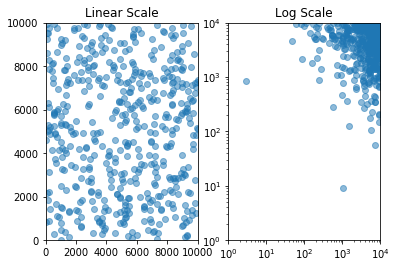

In [4]:
def plotter_1(x,y):

    plt.subplot(1,2,1)
    plt.scatter(x,y,alpha=0.5)

    plt.title('Linear Scale')
    plt.xlim(1,10000), plt.ylim(1,10000)
    #plt.xscale('log'), plt.yscale('log')

    plt.subplot(1,2,2)
    plt.scatter(x,y,alpha=0.5)

    plt.title('Log Scale')
    plt.xlim(1,10000), plt.ylim(1,10000)
    plt.xscale('log'), plt.yscale('log')
    plt.show()
    
plotter_1(events['Feature 1'],events['Feature 2'])

### 1.2 Representing a uniform cell sample

Next, generate a population of five hundred cells with 10 features log-normally distributed around a mean chosen from 10 to 1,000 with a uniform probability. Assume standard deviations are also randomly distributed between 2 and 10.

Print the first 5 events and generate the same bivariate plots. Which axis scale best represents the data, why? 

In [5]:
# ENTER CODE HERE

In [6]:
n_features = 10
n_events = 500
names = ['Feature ' + str(i) for i in range(0,n_features)]
np.random.seed()
means = np.random.uniform(100,8000,n_features)
sd = np.random.uniform(2,10,n_features)

cells = {x:np.random.lognormal(y,z,n_events) for x,y,z in 
                                        zip(names,
                                            np.log10(means),
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}

df = pd.DataFrame(events)
df[0:5]

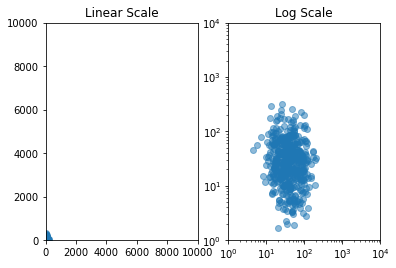

In [7]:
plotter_1(cells['Feature 1'],cells['Feature 2'])

### 1.3 Multiple homogeneous cell populations

Start with a bivariate plot of: 
- Feature 1 vs Feature 2 
- Feature 3 vs Feature 4

In [ ]:
# ENTER CODE HERE

In [152]:
n_features = 10
n_events = 500
names = ['Feature ' + str(i) for i in range(0,n_features)]
np.random.seed()
means = np.random.uniform(2,6,n_features)
sd = np.random.uniform(2,10,n_features)

cells = {x:np.random.lognormal(y,z,n_events) for x,y,z in 
                                        zip(names,
                                            means,
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}

means = np.random.uniform(2,6,n_features)
sd = np.random.uniform(2,10,n_features)

cells2 = {x:np.random.lognormal(y,z,n_events) for x,y,z in 
                                        zip(names,
                                            means,
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}


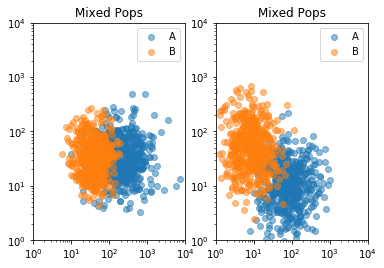

In [153]:
#c1, c2 feature names
def plotter_2(df1,df2,names):
    

    for i in (1,2):
        x = df1[names[i*2]]
        y = df1[names[i*2+1]]
        
        plt.subplot(1,2,i)
        plt.scatter(x,y,alpha=0.5,label='A')

        plt.title('Mixed Pops')
        plt.xlim(1,10000), plt.ylim(1,10000)
        plt.xscale('log'), plt.yscale('log')

        x = df2[names[i*2]]
        y = df2[names[i*2+1]]

        plt.scatter(x,y,alpha=0.5,label='B')

        plt.title('Mixed Pops')
        plt.xlim(1,10000), plt.ylim(1,10000)
        plt.xscale('log'), plt.yscale('log')
        plt.legend()
    
    
    plt.show()
    
plotter_2(cells,cells2,names)

We can also generate 3D plots of various feature combinations

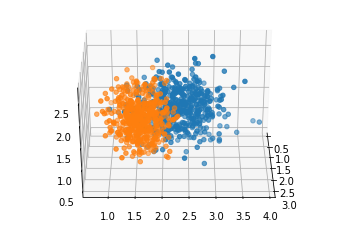

In [225]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(np.log10(cells['Feature 1']),
           np.log10(cells['Feature 2']),
           np.log10(cells['Feature 3']))

ax.scatter(np.log10(cells2['Feature 1']),
           np.log10(cells2['Feature 2']),
           np.log10(cells2['Feature 3']))

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 180, angle), interval=30)
ani.save('mixed-pops.gif', writer=animation.PillowWriter(fps=20))

### 1.4 Inhomogeneous cell populations: multi-gating

In [277]:
n_features = int(10)
n_events = 500
names = ['Feature ' + str(i) for i in range(0,n_features)]
np.random.seed()
means = np.random.uniform(2,6,n_features)
sd = np.random.uniform(2,6,n_features)

cells = {x:np.random.lognormal(y,z,n_events) for x,y,z in 
                                        zip(names,
                                            means,
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}

df1 = pd.DataFrame(cells)

means = np.random.uniform(2,6,n_features)
sd = np.random.uniform(2,6,n_features)

half_events = int(n_events/2)
cells2a = {x:np.random.lognormal(y,z,half_events) for x,y,z in 
                                        zip(names,
                                            means,
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}

# choose a new mean for 
means[5:9] = np.random.uniform(2,6)

cells2b = {x:np.random.lognormal(y,z,half_events) for x,y,z in 
                                        zip(names,
                                            means,
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}



dfA = pd.DataFrame(cells2a)
dfB = pd.DataFrame(cells2b)
df = pd.concat([dfA,dfB])
df[0:5]

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,13.017980,328.512329,46.488868,158.896661,14.484705,25.935011,80.515913,92.723060,380.545426,109.216350
1,4.344803,514.882670,35.032486,156.586685,17.868738,25.444994,18.580118,317.627697,352.424339,110.731066
2,8.852053,202.164336,23.724415,312.315872,17.103804,39.134222,43.457783,227.508540,322.548030,112.325530
3,9.490709,506.319218,70.271221,190.388326,22.316550,69.221691,11.044393,274.522443,293.604222,115.880604
4,9.949300,309.694271,22.065948,628.440999,17.401845,16.185826,20.445262,75.932709,227.762924,94.036810


Print the feature means and standard deviations for each cell population separately

In [ ]:
# ENTER CODE HERE

In [286]:
np.std(df)

Feature 0      8.847878
Feature 1    137.623681
Feature 2     29.594625
Feature 3    170.541994
Feature 4     10.026466
Feature 5     15.900889
Feature 6     10.110445
Feature 7    112.477824
Feature 8    185.274389
Feature 9     52.135673
dtype: float64

Plot the data in 3D. With real-world data we can only discriminate between sub-populations that are "spatially" separated in one or more of the features. 

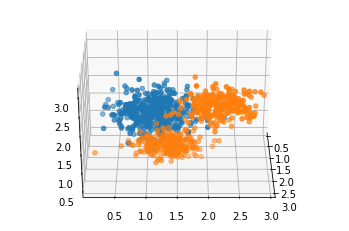

In [288]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

features = [1,7,8]

ax.scatter(np.log10(df1['Feature '+str(features[0])]),
           np.log10(df1['Feature '+str(features[1])]),
           np.log10(df1['Feature '+str(features[2])]))

ax.scatter(np.log10(df['Feature '+str(features[0])]),
           np.log10(df['Feature '+str(features[1])]),
           np.log10(df['Feature '+str(features[2])]))

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 180, angle), interval=30)
ani.save('hetero-pops.gif', writer=animation.PillowWriter(fps=20))

## 2 Linear Independence of Features